In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
diabetes_df=pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,CalorieIntake,Exercise,SleepDuration
0,0,M,148,72,35,0,33.6,0.627,50,1,2508.3,No,6
1,1,F,85,66,29,0,26.6,0.351,31,0,2760.0,Evening,8
2,0,M,183,64,0,0,23.3,0.672,32,1,6480.0,Morning,8
3,1,F,89,66,23,94,28.1,0.167,21,0,NaN,Evening,8
4,0,M,137,40,35,168,43.1,2.288,33,1,1970.0,No,9


In [8]:
l1=[col  for col in diabetes_df.columns if col!="Outcome"]
l1.append("Outcome")

In [9]:
diabetes_df=diabetes_df[l1]
diabetes_df.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Exercise,SleepDuration,Outcome
0,0,M,148,72,35,0,33.6,0.627,50,2508.3,No,6,1
1,1,F,85,66,29,0,26.6,0.351,31,2760.0,Evening,8,0
2,0,M,183,64,0,0,23.3,0.672,32,6480.0,Morning,8,1
3,1,F,89,66,23,94,28.1,0.167,21,NaN,Evening,8,0
4,0,M,137,40,35,168,43.1,2.288,33,1970.0,No,9,1


In [10]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Gender                    768 non-null    object 
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   CalorieIntake             753 non-null    float64
 10  Exercise                  768 non-null    object 
 11  SleepDuration             768 non-null    int64  
 12  Outcome                   768 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 78.1+ KB


##  Collection of Dataset Information


- Pregnancies:- How many Children birth By women
- Gender :- Male/Female
- Glucose :- Glucose Level increase then Diabetes chance decrease
- BloodPressure :- bpm increase then diabetes chance increase
- Skinthickness :- fatty acid
- insulin :- if insulin increase diabetes decrease
- DiabetesPedigreeFunction :- Famliy History diabetes 100% how many family member suffer form diabetes
- Bmi  -: overweighted person have high chance for diabetes
- CalorieIntake :- per day how many calorieIntake
- Exercise :- Exercise Matter 



## Data Clean


In [11]:
diabetes_df["Exercise"]=diabetes_df["Exercise"].replace({"No":1,"Evening":2,"Morning":3,"Both":4}).astype(int)
diabetes_df["Gender"]=diabetes_df["Gender"].replace({"M":1,"F":0}).astype(int)


array([[<AxesSubplot:title={'center':'CalorieIntake'}>]], dtype=object)

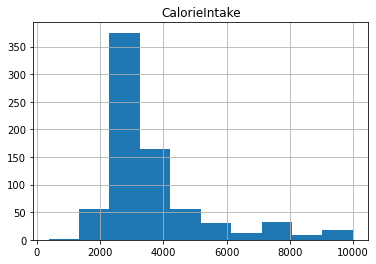

In [12]:
diabetes_df.hist("CalorieIntake")

In [13]:
diabetes_df["CalorieIntake"].fillna(diabetes_df["CalorieIntake"].median(),inplace=True)

In [14]:
diabetes_df.head()

,Pregnancies,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Exercise,SleepDuration,Outcome
0,0,1,148,72,35,0,33.6,0.627,50,2508.3,1,6,1
1,1,0,85,66,29,0,26.6,0.351,31,2760.0,2,8,0
2,0,1,183,64,0,0,23.3,0.672,32,6480.0,3,8,1
3,1,0,89,66,23,94,28.1,0.167,21,2893.0,2,8,0
4,0,1,137,40,35,168,43.1,2.288,33,1970.0,1,9,1


In [15]:
51/768

0.06640625

## Feature Selection start 

In [16]:
category_feature=[]
continues_feature=[]
for j,i in zip(diabetes_df.columns[:-1],diabetes_df.nunique()):
    if (i/diabetes_df.shape[0])>0.06:
        
        continues_feature.append(j)
    else:
        print(j,i)
        category_feature.append(j)
        
category_feature.append("Outcome")
continues_feature.append("Outcome")
    
    


Pregnancies 6
Gender 2
Exercise 4
SleepDuration 12


In [17]:
category_feature,continues_feature

(['Pregnancies', 'Gender', 'Exercise', 'SleepDuration', 'Outcome'],
 ['Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age',
  'CalorieIntake',
  'Outcome'])

### Selection of Category Feature  

#### method 1 : Cramer's V test

In [18]:
category_feature

['Pregnancies', 'Gender', 'Exercise', 'SleepDuration', 'Outcome']

In [20]:
# import FisherExactTest

import scipy.stats as st 
df=pd.DataFrame(columns=category_feature,index=category_feature)
m = np.array([[4,4],[4,5],[10,6]])

for j in category_feature:
    l1=[]
    for i in category_feature:
        df_t=pd.crosstab(diabetes_df[i],diabetes_df[j])
        stat, p, dof, expected = st.chi2_contingency(df_t,correction=True)

        x=np.ndarray.flatten(expected)
        y=x<5
#         if True in y or p<0.05: 
# #             print(i,p) ## failed chi squrared test but their is no module for fisher exact test 
#             # but here p-value<0.05  is small so we can select this feature.
#             ## 
#             l1.append(p)
#         else:
        t=min(df_t.shape)-1
        deno=sum(df_t.sum())
        x=np.sqrt(stat / deno)
        l1.append(x)
    df.loc[:,j]=pd.Series(l1,index=category_feature)
    
## Here we can see all categotry feature relavent for Our Outcome variable 

In [21]:
# df.style.apply(lambda x: ["background: red" if v>1.980848e-119 else "" for v in x], axis = 1)
df.head()

,Pregnancies,Gender,Exercise,SleepDuration,Outcome
Pregnancies,2.236068,0.847420,0.228767,1.679509,0.215839
Gender,0.847420,0.996990,0.087965,0.299325,0.109860
Exercise,0.228767,0.087965,1.732051,0.568792,0.848186
SleepDuration,1.679509,0.299325,0.568792,3.316625,0.621078
Outcome,0.215839,0.109860,0.848186,0.621078,0.997134


<b> Here we can see all categotry feature relavent for Our Outcome variable </b>
<br>
<b> Note : </b> Here we know the intra relationship between sleep duration and exercise  but we need to take both mesaurements
          for checking good body health

### Selection of Continues variable 

In [24]:
continues_feature

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'CalorieIntake',
 'Outcome']

In [23]:
continue_diabetes_feature_df=diabetes_df[continues_feature]
continue_diabetes_feature_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,CalorieIntake,Outcome
0,148,72,35,0,33.6,0.627,50,2508.3,1
1,85,66,29,0,26.6,0.351,31,2760.0,0
2,183,64,0,0,23.3,0.672,32,6480.0,1
3,89,66,23,94,28.1,0.167,21,2893.0,0
4,137,40,35,168,43.1,2.288,33,1970.0,1
...,...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,2860.0,0
764,122,70,27,0,36.8,0.340,27,3320.0,0
765,121,72,23,112,26.2,0.245,30,3453.0,0
766,126,60,0,0,30.1,0.349,47,8850.0,1


In [ ]:
for c,i,j in zip(continue_diabetes_feature_df.columns,continue_diabetes_feature_df.skew(),continue_diabetes_feature_df.kurtosis()):
    print(c,i,j)


### Anova test

In [ ]:

for i in continue_diabetes_feature_df.columns:
    fig=plt.figure(figsize=(6,6))
    X0=continue_diabetes_feature_df[continue_diabetes_feature_df["Outcome"]==0][i]
    
    X1=continue_diabetes_feature_df[continue_diabetes_feature_df["Outcome"]==1][i]
    F,p_value=st.f_oneway(X0,X1) 
    
    bbox = fig.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width, height = bbox.width, bbox.height
    
    sns.histplot(data=continue_diabetes_feature_df,x=continue_diabetes_feature_df[i],hue="Outcome")
    plt.title("p_value="+str(round(p_value,4)))

    
    
    
  
    
   

<b style="font-size:16px"> Almost all the columns follow normal distributed </b>

## Now it's time to visualiaze data in 2d plot 

In [ ]:
import atoti as tt

session = tt.create_session()

In [ ]:
df = session.read_csv("diabetes.csv")

In [ ]:
df.head()

In [ ]:
cube = session.create_cube(df)

In [ ]:
h = cube.hierarchies
h

In [ ]:
session.url

In [ ]:
import dtale

d=dtale.show(diabetes_df)

In [ ]:
import seaborn as sns


In [ ]:
sns.pairplot(diabetes_df,hue="Outcome")
